# Facebook prophet

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

import warnings                                  
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
source = pd.read_csv('E:\\Analytics\\Projects\\forecast_cargo_flow\\data\\sample_csu_since_2019.csv', delimiter=';')

In [4]:
source.head()

,r_date,warehouse_id,measure_unit_id,fact,type_flow_id
0,2019-01-01,28999900,1,0,1
1,2019-01-01,28999900,1,0,2
2,2019-01-01,28999900,1,0,3
3,2019-01-02,28999900,1,2,1
4,2019-01-02,28999900,1,0,2


In [5]:
df = source[['r_date', 'fact']] # оставляем только дату и факт
df = df.groupby('r_date').sum() # группируем по дате
df.reset_index(inplace=True) # сбрасываем индексы

df['r_date'] = pd.to_datetime(df['r_date'], format='%Y-%m-%d') # r_date в дату
df['r_date'] = pd.to_datetime(df["r_date"].dt.strftime('%Y-%m-%d'))

df['fact'] = pd.to_numeric(df['fact']) # факт в числовой тип


In [6]:
df.head()

,r_date,fact
0,2019-01-01,0
1,2019-01-02,2
2,2019-01-03,3391
3,2019-01-04,35128
4,2019-01-05,41658


In [7]:
predictions = 30

df.columns = ['ds', 'y']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      814 non-null    datetime64[ns]
 1   y       814 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.8 KB


In [8]:
df

,ds,y
0,2019-01-01,0
1,2019-01-02,2
2,2019-01-03,3391
3,2019-01-04,35128
4,2019-01-05,41658
...,...,...
809,2021-03-20,48241
810,2021-03-21,32933
811,2021-03-22,32961
812,2021-03-23,45396


In [9]:
train_df = df[:-predictions]

In [11]:
model = Prophet(weekly_seasonality=True)

In [12]:
model.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = model.make_future_dataframe(periods=predictions, freq='D')
future.tail(10)

,ds
804,2021-03-15
805,2021-03-16
806,2021-03-17
807,2021-03-18
808,2021-03-19
809,2021-03-20
810,2021-03-21
811,2021-03-22
812,2021-03-23
813,2021-03-24


In [14]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
809,2021-03-20,51265.550302,39505.613210,60618.326014,51221.742440,51298.585224,-417.223752,-417.223752,-417.223752,-1425.064462,-1425.064462,-1425.064462,1007.840710,1007.840710,1007.840710,0.0,0.0,0.0,50848.326550
810,2021-03-21,51247.965007,30848.827485,51463.545179,51201.618330,51283.784901,-9781.599802,-9781.599802,-9781.599802,-10353.758722,-10353.758722,-10353.758722,572.158920,572.158920,572.158920,0.0,0.0,0.0,41466.365205
811,2021-03-22,51230.379711,33727.305679,54472.172972,51181.284067,51269.459859,-7102.949250,-7102.949250,-7102.949250,-7270.725706,-7270.725706,-7270.725706,167.776456,167.776456,167.776456,0.0,0.0,0.0,44127.430461
812,2021-03-23,51212.794416,45583.763150,65634.125534,51160.009307,51255.375849,4466.274327,4466.274327,4466.274327,4667.495409,4667.495409,4667.495409,-201.221082,-201.221082,-201.221082,0.0,0.0,0.0,55679.068743
813,2021-03-24,51195.209120,46570.341449,67577.362991,51139.087965,51240.815336,5677.040712,5677.040712,5677.040712,6208.891357,6208.891357,6208.891357,-531.850644,-531.850644,-531.850644,0.0,0.0,0.0,56872.249833


Mean absolute error 10778.66


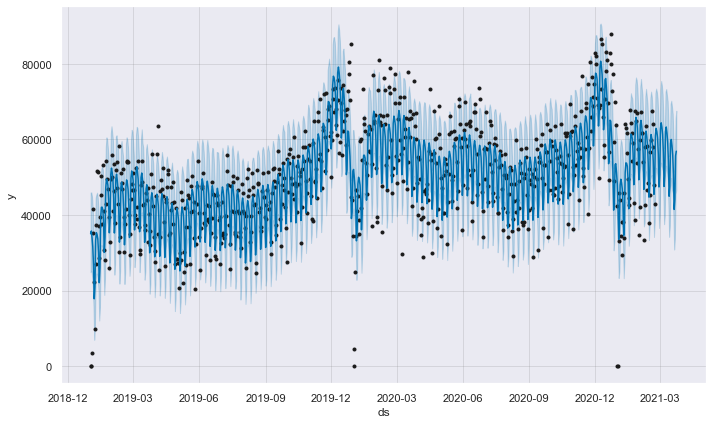

In [16]:
error = mean_absolute_error(df[-predictions:]['y'], forecast[-predictions:]['yhat'])
print("Mean absolute error {0:.2f}".format(error))
_ = model.plot(forecast)

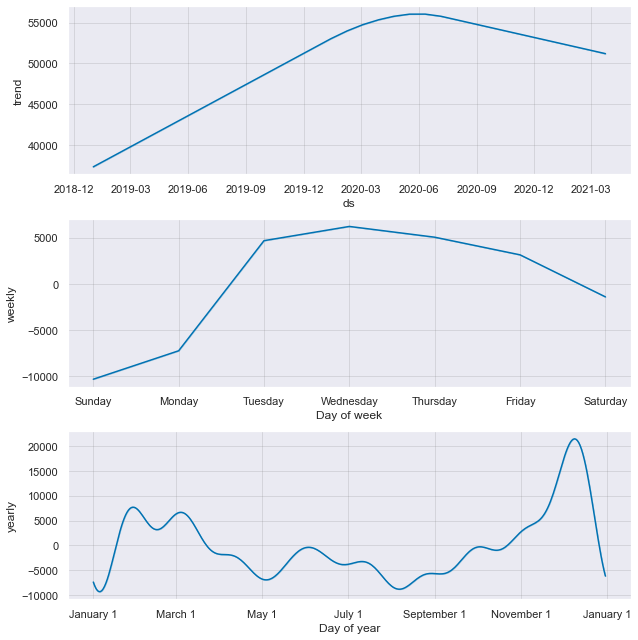

In [17]:
_ = model.plot_components(forecast)

Быстро, просто, можно даже не вникать. Неплохо выводятся компоненты, но вот ошибка предсказания...